# Parcial 1 TAM

# 2.1 Modelos de regresion, optimización y discusion

Se utilizaron modelos de IA para transcribir las ecuaciones matematicas a formato latex y pegarlas en la celda markdown, usando propmts como "Transcribe la solucion de la optimizacion del modelo de minimos cuadrados a formato latex paso a paso"

**Considerando el modelo de regresión**  $t_n = \phi\left(\mathbf{x}_n\right)^\top \mathbf{w} + \eta_n $ 
**, con** $ \left\{t_n \in \mathbb{R}, \mathbf{x}_n \in \mathbb{R}^P\right\}_{n=1}^N, \mathbf{w} \in \mathbb{R}^Q, \phi : \mathbb{R}^P \to \mathbb{R}^Q,
Q \geq P$, **y** $\eta_n \sim \mathcal{N}\left(\eta_n \mid 0, \sigma^2_\eta\right)$. **revisamos el problema de optimización y su solución para diferentes modelos.**

* **2.1.1 Minimos cuadrados**

La funcion de costo es: $$\mathcal{L}(\mathbf{w}) = \mathbb{E}\left\{ \left\| t_n - \phi\left(\mathbf{x}_n\right)^\top \mathbf{w} \right\|^2 \right\}$$

Donde:
- $\mathbb{E}\{\cdot\}$ denota el valor esperado.
- $t_n$ son las observaciones reales.
- $\phi\left(\mathbf{x}_n\right)^\top \mathbf{w}$ son las predicciones del modelo.
- $\|\cdot\|$ es la norma Euclidiana.

por tanto la optimización sería:
$$ \mathbf{w}^* = argmin_w \mathcal{L}(\mathbf{w})$$

Su solución se encuentra tomando la derivada de la función de costo e igualando a 0, asumiendo el operador esperanza como media muestral:
$$\mathbf{w}^* => \frac{d \mathcal{L}(\mathbf{w})}{d \mathbf{w}} = 0$$
Lo que nos deja como resultado:
$$ \mathbf{w}^* = \left( \mathbf{\phi}^\top \mathbf{\phi} \right)^{-1} \mathbf{\phi}^\top \mathbf{t} $$


* **2.1.2 Minimos cuadrados regularizados**

La funcion de costo es:
$$\mathcal{L}(\mathbf{w}) = \mathbb{E}\left\{ \left\| t_n - \phi\left(\mathbf{x}_n\right)^\top \mathbf{w} \right\|^2 \right\} + \lambda \|\mathbf{w}\|^2 $$

Aquí solo se añade el termino $\lambda \|\mathbf{w}\|^2$ que denota una penalización adicional por el factor norma 2 cuadrado de los pesos del modelo $\mathbf{w}$, balanceado por un peso de regularización $\lambda$

La optimización sigue siendo:
$$ \mathbf{w}^* = argmin_w \mathcal{L}(\mathbf{w})$$

Y solución tambien se encuentra derivando e igualando a cero, asumiendo la esperanza como media muestral: 
$$ \mathbf{w}^* = \left( \mathbf{\phi}^\top \mathbf{\phi} + \lambda \mathbf{I} \right)^{-1} \mathbf{\phi}^\top \mathbf{t}$$

* **2.1.3 Máxima verosimilitud**

La funcion de costo es:
$$ \mathcal{L}(t, f(\mathbf{x})) = \log \left( \prod_{n=1}^{N} \mathcal{N}(t_n \mid \phi(\mathbf{x}_n)^\top \mathbf{w}, \sigma_n^2) \right) $$
Esto se conoce como el logaritmo del likelihood o verosimilitud. El objetivo es maximizar esta verosimilitud, para lo cual minimizamos el negativo dandonos el siguiente problema de optimización:
$$ \mathbf{w}^* = arg min_{\mathbf{w}}  -\mathcal{L}(t, f(\mathbf{x})) $$
Derivando respecto a $\mathbf{w}$ e igualando a 0 obtenemos: 
$$\mathbf{w}^* = (\phi^\top \phi)^{-1} \phi^\top \mathbf{t} $$
Podemos ver que es igual a la solución por minimos cuadrados, lo que denota que minimos cuadrados es una solución puntual de maxima verosimilitd para cuando los datos son i.i.d y tienen ruido gaussiano.

* **2.1.4 Máximo a posteriori**

En máximo a posteriori se asume que los pesos no son fijos, sino que siguen una distribucion de probabilidad, que llamamos el prior, Por bayes, podemos definir la funcion de distribucion posterior (la de estimacion) como un producto entre el liklihood y la funcion prior de los pesos, lo que nos da la funcion de costo: 
$$ \widetilde{\mathbf{P}}(\mathbf{W}|\mathbf{T},\Phi,\sigma_{\eta}^2) = \mathbf{P}(t|\Phi,\mathbf{W},\sigma_{\eta}^2) \mathbf{P}(\mathbf{W})$$
$$\mathcal{L}(t, f(\mathbf{x})) = \widetilde{\mathbf{P}}(\mathbf{W}|\mathbf{T},\Phi,\sigma_{\eta}^2) =   \prod_{n=1}^{N} \mathcal{N}(t_n \mid \phi(\mathbf{x}_n)^\top \mathbf{w}, \sigma_n^2) \prod_{j=1}^{Q} \mathcal{N}(w_j \mid 0, \sigma_w^2)  $$

Tomando logaritmo podemos plantear el problema de optimizacion como:
$$ \mathbf{w}^* = arg min_{\mathbf{w}}  -\log \mathcal{L}(t, f(\mathbf{x})) $$

Nuevamente derivando e igualando a 0 tenemos la solución:
$$ \mathbf{w}^* = \left( \phi^\top \phi + \lambda I \right)^{-1} \phi^\top \mathbf{t} $$

Vemos que, similar al caso de max-verosimilitud, el maximo a posteriori tiene la misma solucion del caso de minimos cuadrados regularizados, por lo que podemos decir que minimos cuarados regularizados es un caso puntual de maximo a posteriori, asumiendo datos i.i.d, con distribuciones gaussianas tanto en el ruido como en el prior de los pesos.

* **2.1.5 Modelo lineal bayesiano**

Este modelo tambien busca maximizar la probabilidad posterior, que no es otra que la conjunta de la salida esperada, dada una observacion en el modelo ($p(t_{\eta}|\phi(x_\eta)\mathbf{w}^T,\sigma_\eta^2)$). o segun vimos antes, maximizar el producto del likelihood y un prior.

Si se presta atención a la definicion del modelo, tn ya cumple la condición de ser lineal ($t_\eta = \phi\left(\mathbf{x}_n\right)^\top \mathbf{w} + \eta_n $)

Con todo esto, el likelihood se puede escribir como una funcion de distribucion gaussiana:
$$p(\mathbf{t}|\Phi\mathbf{w}^T,\sigma_\eta^2)=\mathcal{G}(\mathbf{t}|\Phi w^T,\sigma_\eta^2)$$

Fijando el prior de w como $p(\mathbf{w}) = \mathcal{G}(\mathbf{w}|0,\sigma_\mathbf{w}^2)$ tenemos que el posterior es:
$$p(\mathbf{w}|\mathbf{t}) = \mathcal{G}(\mathbf{w}|\tilde{m}_N,\tilde{S}_N)$$

Con media:
$$\tilde{\mathbf{m}}_N = \frac{1}{\sigma_\eta^2} \tilde{\mathbf{S}}_N \boldsymbol{\Phi}^\top \mathbf{t}$$
Y desviacion estandar:
$$\tilde{\mathbf{S}}_N = \left( \frac{1}{\sigma_w^2} \mathbf{I}_Q + \frac{1}{\sigma_\eta^2} \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1}
= \left( \frac{1}{\sigma_\eta^2} \right)^{-1} \left( \frac{\sigma_\eta^2}{\sigma_w^2} \mathbf{I}_Q + \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1}$$

Reemplazando la desviacion estandar en la media tenemos:

$$\tilde{\mathbf{m}}_N = \left( \frac{\sigma_\eta^2}{\sigma_w^2} \mathbf{I}_Q + \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \mathbf{t} $$

Este punto es importante, si llamamos a la relacion de las desviaciones estandar $\lambda$, resulta que esa media es identica a la solucion de minimos cuadrados regularizados 

$$\tilde{\mathbf{m}}_N = \left( \lambda \mathbf{I}_Q + \boldsymbol{\Phi}^\top \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^\top \mathbf{t} $$

Y si optimizamos el posterior para encontrar su maximo usando logaritmo, derivada e igualando a 0, obtenemos que precisamente el optimo $\mathbf{w}^*$ es igual a la media $\tilde{\mathbf{m}}_N$. Esto indica que resolver el modelo lineal bayesiano es igual a resolver el problema de minimos cuadrados regulrizados, y a resolver el problema de maximo a posteriori, siempre que se trabaje con ruido gaussiano, y con prior para los pesos gaussiano con media 0 y desviacion estandar $\sigma_{\mathbf{w}}^2$

* **2.1.6 regresion por kernel rigido**

Se fundamenta en el regresor lineal pero regularizado, dando que el problema de optimización es:
$$\mathbf{\omega}^* = \arg\min_{\mathbf{\omega}} \| \mathbf{y} - \boldsymbol{\Phi} \mathbf{\omega} \|_2^2 + \alpha \| \mathbf{\omega} \|_2^2$$

Ya vimos en el regresor por minimos cuadrados regularizados que la solucion optima a este problema es:
$$\mathbf{\omega}^* = (\boldsymbol{\Phi}^\top \boldsymbol{\Phi} + \alpha \mathbf{I})^{-1} \boldsymbol{\Phi}^\top \mathbf{y}$$
Si movemos $\Phi^T$ a la izquierda trasponiendo el parentesis, y denotamos $\Phi$ como un kernel $k$, tenemos la optimizacion del problema en terminos de un kernel lineal:
$$ \omega^* = \Phi^\top (\Phi \Phi^\top + \alpha I)^{-1} y = k(\cdot)^\top (K + \alpha I)^{-1} y $$

Donde el parametro alfa que define la regularización, es lo que lo denota rigido.
(Tomado del cuaderno 1_KernelRidgeRegression.ipynb del curso)


* **2.1.7 Gaussian process**

Dados unos datos contaminados con ruido gaussiano $t_n = f(x_n) + \epsilon_n$, asumimos la probabilidad conjunta de la salida como 
$$p(\mathbf{t} \mid f(\mathbf{X})) = \mathcal{N}(\mathbf{t} \mid f(\mathbf{X}), \sigma_\epsilon^2 \mathbf{I}_N) $$

Si tenems un prior $f(\mathbf{X}) \sim \mathcal{N}(0, \mathbf{K})$
La marginal sobre la salida es:
$$p(\mathbf{t}) = \int p(\mathbf{t} \mid f(\mathbf{X})) p(f(\mathbf{X})) \, df$$
$$p(\mathbf{t}) = \mathcal{N}(\mathbf{t} \mid 0, \mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N) $$

$K$ representa la matriz de covarianza que se genera a partir del kernel seleccionado para el proceso gaussiano y $f(x)$ es una funcion que incluye los mapeos y pesos del modelo ($\phi(x)^T\mathbf{w}$)

En el proceso gaussiano se optimizan los hyperparametros del modelo maximizando el log likelihood marginal, que se obtiene de la marginal que recien definimos. Tomando logaritmo y expandiendo, el problema de optimizacion es:

$$\theta^{*} = argmax_{\theta} -\frac{1}{2} \mathbf{t}^\top (\mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N)^{-1} \mathbf{t}- \frac{1}{2} \log \lvert \mathbf{K} + \sigma_\epsilon^2 \mathbf{I}_N \rvert - \frac{N}{2} \log 2\pi$$

los hiperparametros $\theta$ estan contenidos dentro de la matriz de covarianza $K$ ,que se define desde el kernel, y en la desviacion estandar del ruido.

La solución de este problema de optimización ya no es analitica, por lo que se recurre a algoritmos como el de gradiente descendiente para encontrar los valores optimos de los hiperparametros tras multiples iteraciones.
El proceso general es:

- Definir unos $\theta$ iniciales
- Calcular el gradiente (por ejemplo con gradiente descendiente)
- Actualizar los $\theta$ (por ejemplo siguiendo $\theta \gets \theta + \eta \frac{\partial \log p(\mathbf{t} \mid \theta)}{\partial \theta_i}$ donde $\eta$ es la tasa de aprendizaje del modelo.)
- Repetir hasta converger.

La convergencia se da cuando el gradiente tienda a 0, lo que significa que los hiperparametros llegaron a un punto estable(Se encontro el máximo)


* **2.1.8 Discusion**

**En terminos generales, todos los modelos anteriormente descritos tienen similitudes en su fundamentacion. Ya se ha comentado sobre como minimos cuadrados y minimos cuadrados regularizados son casos puntuales de max-verosimilitud y max-a posteriori para el caso de ruido y prior gaussiano. Tambien se vio que el modelo lineal bayesiano y el kernel rigido se fundamentan en la maximización de los likelihood, y en el caso lineal por ejemplo, tambien coinciden con la solucion de minimos cuadrados regularizados al asumir ruido gaussiano y prior con media 0, lo que indicaria que son tambien una aplicacion de max-a posteriori. El kernel rigido tiene una solucion similar cambiando las funciones de mapeo por los kernels, pero escencialmente da la misma forma de resultado**

**El más diferente seria el caso del proceso gaussiano, ya que este no cuenta con optimización analitica debido a su complejidad. Sin embargo tambien se fundamenta en la maximizacion del likelihood igual que los demás modelos**

**Las principales diferencias radican en el uso de priors, particularmente en el caso del minimos cuadrados simple y el max-verosimilitud. Estos 2 modelos no asumen prior, por lo que los pesos del modelo no tienen probabilidad, esto los diferencia de los demás modelos, especialmente porque al no incluir prior, son modelos no bayesianos. Tecnicamente los minimos cuadrados regularizados como tal tampoco se definen usando prior ni probabilidades, pero al demostrar que son un caso puntual del max-a posteriori se podria afirmar que desde su fundamento si incluyen probabilidades y si son bayesianos.**

**En conclusión, en mayor o menor medida todos los modelos se fundamentan en la maximizacion de la verosimilitud y el teorema de bayes, aunque algunos casos son más generales que otros y no exigen parametros fijos. Se podria realizar max-verosimilitud o max-a posteriori con ruido no gaussiano o con priors que no tengan media 0. En el caso de los modelos con uso de kernels son aun más flexibles, pero en escencia se fundamentan en los mismos principios probabilisticos.**

# 2.2 Aplicación de los modelos de regresión

**Lo primero es importar la base de datos y las librerias que se van a usar, y realizar un pequeño analisis de la base de datos.**

*Se uso un modelo de IA para generar el codigo base. prompt:"basado en la imagen adjunta, quiero el codigo para importar a un notebook de kaggle la base de datos alli mencionada, importar las librerias que puedan ser necesarias para realizar ese ejercicio, y realizar un pequeño analisis exploratorio de la base de datos."*

Primeras filas del dataset:


,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  11142 non-null  object 
 1   Tm      11142 non-null  object 
 2   Opp     11142 non-null  object 
 3   Res     11142 non-null  object 
 4   MP      11142 non-null  float64
 5   FG      11142 non-null  int64  
 6   FGA     11142 non-null  int64  
 7   FG%     11142 non-null  float64
 8   3P      11142 non-null  int64  
 9   3PA     11142 non-null  int64  
 10  3P%     11142 non-null  float64
 11  FT      11142 non-null  int64  
 12  FTA     11142 non-null  int64  
 13  FT%     11142 non-null  float64
 14  ORB     11142 non-null  int64  
 15  DRB     11142 non-null  int64  
 16  TRB     11142 non-null  int64  
 17  AST     11142 non-null  int64  
 18  STL     11142 non-null  int64  
 19  BLK     11142 non-null  int64  
 20  TOV     11142 non-null  int64  
 21  P

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000,11142.000000
mean,22.384337,3.827230,8.237480,0.427628,1.252019,3.485101,0.264960,1.579698,2.027015,0.418320,1.006283,3.078711,4.084994,2.440854,0.783073,0.474242,1.306408,1.768085,10.486178,8.509917
std,10.907405,3.241366,6.054443,0.255645,1.535924,3.167822,0.288804,2.231562,2.694026,0.435195,1.340428,2.716176,3.442144,2.621032,1.002675,0.835984,1.450804,1.447670,8.821426,7.801462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,14.300000,1.000000,3.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.300000
50%,23.450000,3.000000,7.000000,0.444000,1.000000,3.000000,0.222000,1.000000,1.000000,0.333000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,7.000000
75%,31.395000,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,2.000000,4.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,13.100000
max,47.780000,22.000000,38.000000,1.000000,10.000000,20.000000,1.000000,17.000000,26.000000,1.000000,12.000000,23.000000,23.000000,22.000000,8.000000,10.000000,10.000000,6.000000,60.000000,54.200000



Valores nulos en cada columna:
Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64

Distribución de las columnas numéricas:


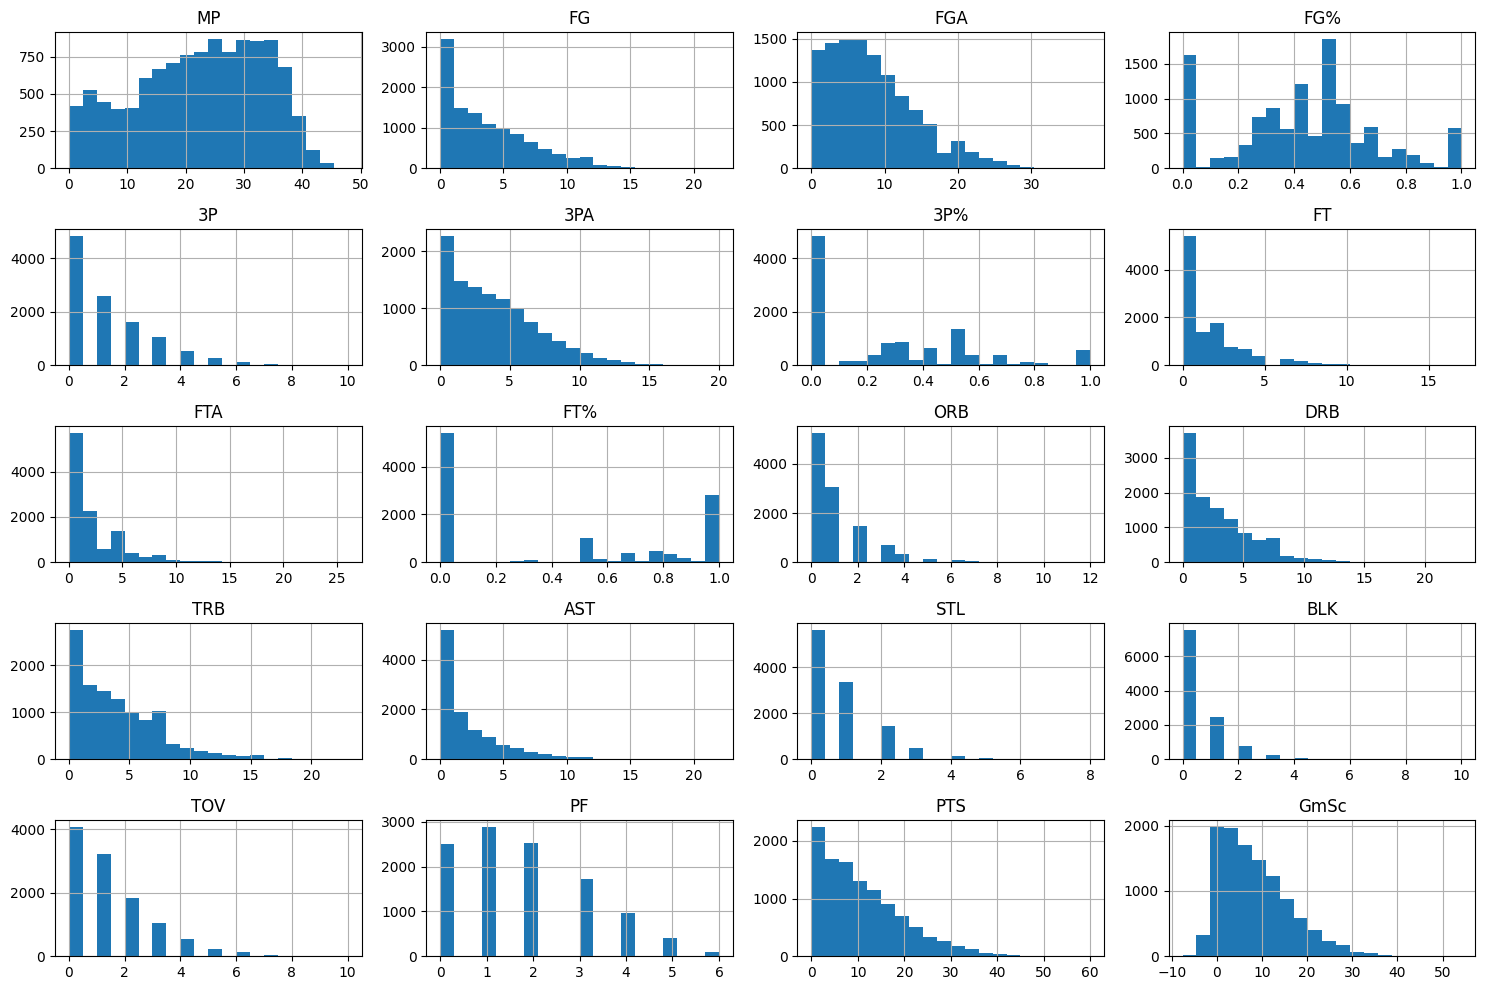


Mapa de calor de correlaciones:


ValueError: could not convert string to float: 'Jayson Tatum'

<Figure size 1200x800 with 0 Axes>

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
# Asegúrate de que el archivo está en el directorio de trabajo de Kaggle o especifica la ruta correcta
file_path = "/kaggle/input/nba-player-stats-season-2425/database_24_25.csv"  # Cambia esto al nombre del archivo real
data = pd.read_csv(file_path)

# Análisis exploratorio inicial

# Vista general de los datos
print("Primeras filas del dataset:")
display(data.head())

print("\nInformación general del dataset:")
data.info()

print("\nEstadísticas descriptivas:")
display(data.describe())

# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(data.isnull().sum())

# Distribuciones de las características principales
print("\nDistribución de las columnas numéricas:")
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlación entre variables numéricas
print("\nMapa de calor de correlaciones:")
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlaciones")
plt.show()

# Visualización básica (opcional, ajusta según el dataset)
# Por ejemplo, analizar una variable objetivo (si existe)
if "target" in data.columns:
    print("\nDistribución de la variable objetivo:")
    sns.histplot(data["target"], kde=True)
    plt.title("Distribución de la Variable Objetivo")
    plt.show()
